Heyy Everyone! This is my work on prediction of medical insurance. Seeking your sincere feedback on further improvement. Thank you!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-premium-prediction/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
filename = '/kaggle/input/insurance-premium-prediction/insurance.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.rename(columns = {'expenses':'charges'}, inplace = True) 

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

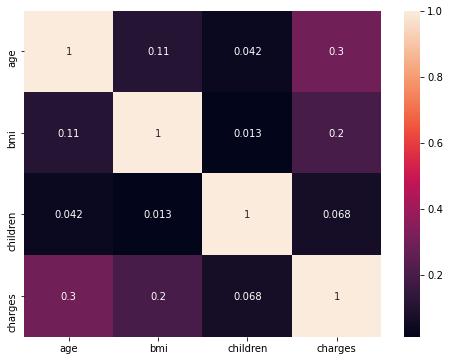

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

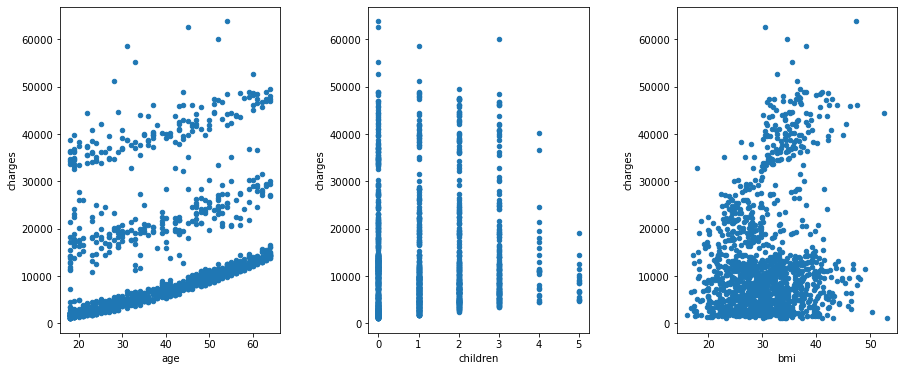

In [12]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='charges', ax=axes[0])
df.plot(kind='scatter', x='children', y='charges', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])

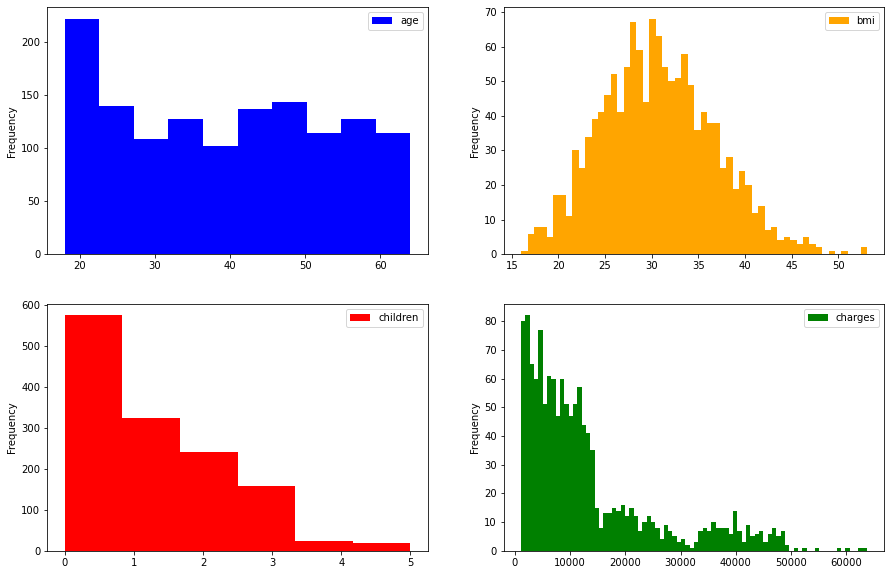

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
df.plot(kind='hist', y='charges', ax=axes[1][1], color = 'green', bins = 80)

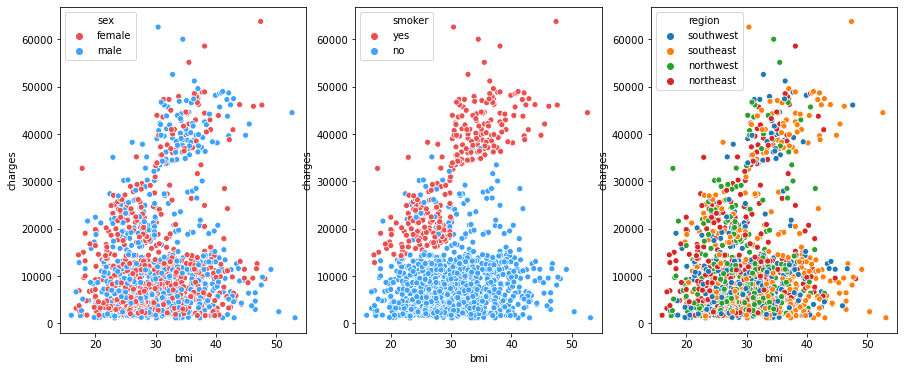

In [14]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=df,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=df,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=df,hue='region')

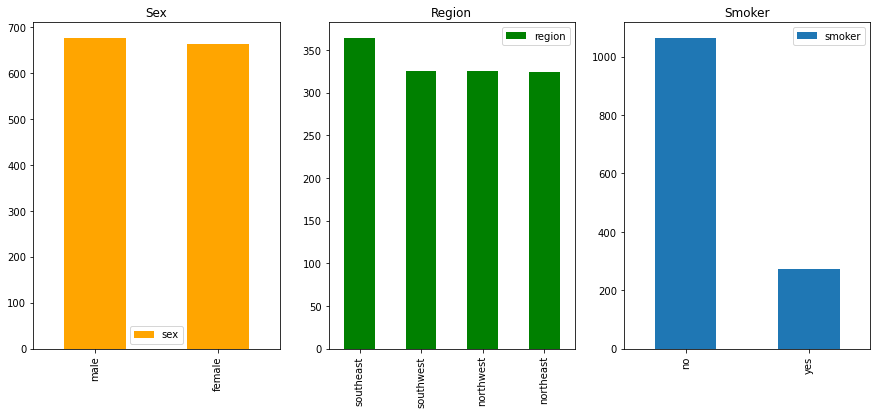

In [15]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
df['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
df['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
df['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')


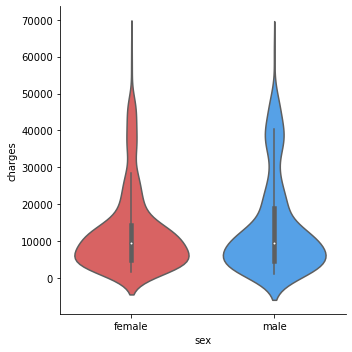

In [16]:
palette=['#EB5050','#3EA2FF']
sns.catplot(x='sex', y='charges', kind='violin', palette=palette, data=df)

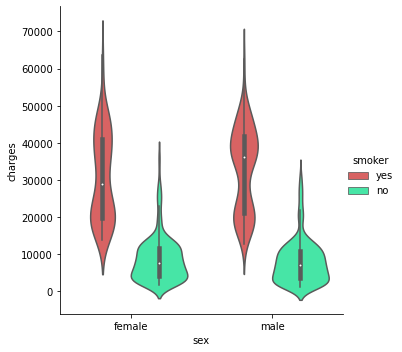

In [17]:
palette=['#EB5050','#2DFFAB'] 
sns.catplot(x='sex', y='charges', kind='violin', hue='smoker', palette=palette, data=df)

Text(0.5, 1.0, 'Distribution of Charges')

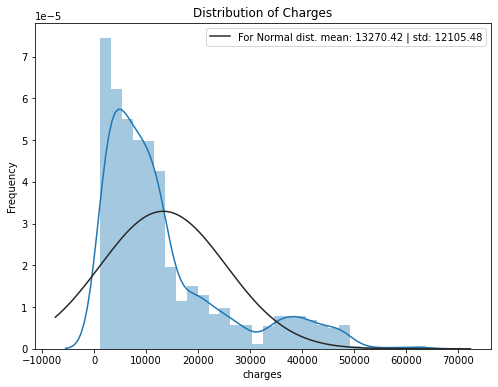

In [18]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['charges'], fit=norm)
(mu,sigma)= norm.fit(df['charges'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')


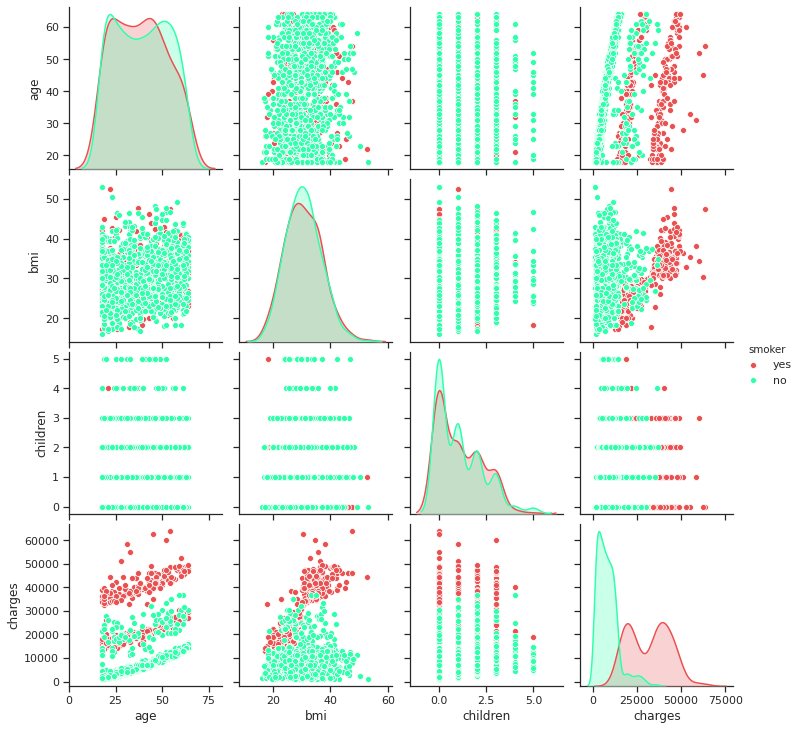

In [19]:
palette=['#EB5050','#2DFFAB'] 
sns.set(style="ticks")
sns.pairplot(data=df, hue='smoker', palette=palette)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [21]:
df.drop(["region"], axis=1, inplace=True) 
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [22]:
# Changing binary categories to 1s and 0s
df['sex'] = df['sex'].map(lambda s :1  if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)

df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [23]:
X = df.drop(['charges'], axis = 1)
y = df.charges
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)


Shape of X:  (1338, 5)
Shape of y:  (1338,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952529674123329


In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


In [26]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,0.985155,-1.367732,-0.892144,-0.503736


In [28]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [29]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [30]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [31]:
from sklearn.linear_model import LinearRegression  

multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  -0.48955318862091035
Testing Accuracy:  -0.32407582691782677
RMSE for Training Data:  14589.270271020132
RMSE for Testing Data:  14437.97885483326
Accuracy for 20 - Fold Cross Predicted:  0.7164406277916135


In [32]:
from sklearn.svm import SVR  

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  
model_summary(support_vector_reg, "Support_Vector_Regressor")

Support_Vector_Regressor
Training Accuracy:  0.652232923332688
Testing Accuracy:  0.7343309955103848
RMSE for Training Data:  7049.361696268942
RMSE for Testing Data:  6467.26143175293
Accuracy for 20 - Fold Cross Predicted:  0.7009535008136862


In [33]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  
print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy: ", accuracy_PR_train)
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy: ", accuracy_PR_test)
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=20)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Accuracy:  0.8355789214701362
Testing Accuracy:  0.880945411305889
RMSE for Training Data:  4847.125990188415
RMSE for Testing Data:  4329.3534424717955
Accuracy for 20-Fold Cross Predicted:  0.8393113776367419


In [34]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8694256881440832
Testing Accuracy:  0.8711939744446933
RMSE for Training Data:  4319.509514116047
RMSE for Testing Data:  4503.167101749359
Accuracy for 20 - Fold Cross Predicted:  0.8519568550673102


[Text(277.83750000000003, 498.3, 'X[4] <= 0.741\nmse = 142893055.895\nsamples = 1003\nvalue = 13215.863'),
 Text(146.47500000000002, 407.70000000000005, 'X[0] <= 0.232\nmse = 37722601.958\nsamples = 800\nvalue = 8536.841'),
 Text(74.4, 317.1, 'X[0] <= -0.906\nmse = 22884561.599\nsamples = 444\nvalue = 5416.66'),
 Text(37.2, 226.5, 'X[3] <= 0.351\nmse = 24961248.888\nsamples = 197\nvalue = 3832.304'),
 Text(18.6, 135.89999999999998, 'X[0] <= -1.191\nmse = 20054511.927\nsamples = 166\nvalue = 3351.646'),
 Text(9.3, 45.299999999999955, 'mse = 17410006.45\nsamples = 118\nvalue = 2932.558'),
 Text(27.900000000000002, 45.299999999999955, 'mse = 25062384.591\nsamples = 48\nvalue = 4381.905'),
 Text(55.800000000000004, 135.89999999999998, 'X[2] <= 0.005\nmse = 43374237.869\nsamples = 31\nvalue = 6406.145'),
 Text(46.5, 45.299999999999955, 'mse = 56623360.089\nsamples = 22\nvalue = 7529.156'),
 Text(65.10000000000001, 45.299999999999955, 'mse = 368888.029\nsamples = 9\nvalue = 3661.007'),
 Text

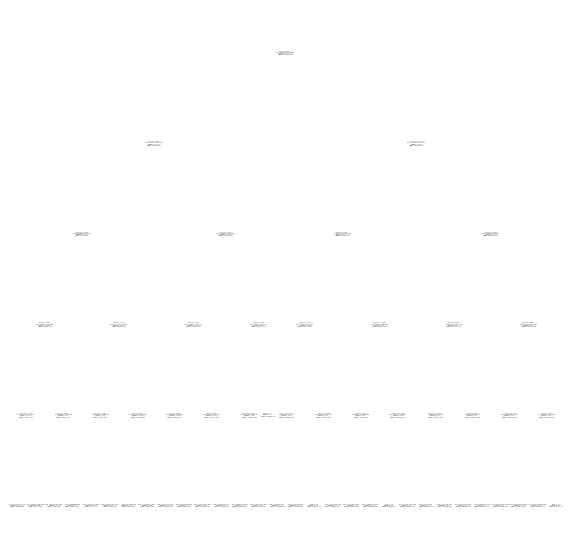

In [35]:
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
sklearn.tree.plot_tree(decision_tree_reg)

In [36]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.878251099532176
Testing Accuracy:  0.8969203533577584
RMSE for Training Data:  4170.979793736701
RMSE for Testing Data:  4028.43567685455
Accuracy for 20 - Fold Cross Predicted:  0.857751048313981


**The model with the highest accuracy is Random Forest compared to other models.**